ETAP 1

Importowanie potrzebnych bibliotek

In [315]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

Wczytanie danych

In [316]:
data = pd.read_csv('messy_data.csv')

Podstawowa analiza danych

In [317]:
data.head()

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.7,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.2,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.9,I1,J,Fair,6,,3.7,61.7,,2400


In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      200 non-null    object 
 2    color        200 non-null    object 
 3    cut          200 non-null    object 
 4    x dimension  200 non-null    object 
 5    y dimension  200 non-null    object 
 6    z dimension  200 non-null    object 
 7    depth        200 non-null    object 
 8    table        200 non-null    object 
 9    price        200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


In [319]:
print(data.columns)

Index(['carat', ' clarity', ' color', ' cut', ' x dimension', ' y dimension',
       ' z dimension', ' depth', ' table', ' price'],
      dtype='object')


Usunięcie zbędnych spacji z nazw kolumn

In [320]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['carat', 'clarity', 'color', 'cut', 'x dimension', 'y dimension',
       'z dimension', 'depth', 'table', 'price'],
      dtype='object')


Usunięcie pustych ciągów jako NaN

In [321]:
data = data.apply(lambda col: col.map(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x))

Konwersja typów danych

In [322]:
columns_to_convert = ['x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [323]:
data.head()

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.7,vvs2,E,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,Si2,h,Good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.2,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.9,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0


In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        150 non-null    float64
 1   clarity      200 non-null    object 
 2   color        200 non-null    object 
 3   cut          200 non-null    object 
 4   x dimension  197 non-null    float64
 5   y dimension  136 non-null    float64
 6   z dimension  152 non-null    float64
 7   depth        133 non-null    float64
 8   table        167 non-null    float64
 9   price        196 non-null    float64
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


Usunięcie duplikatów

In [325]:
data = data.drop_duplicates()

Analiza wartości odstających

In [326]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [327]:
categorical_columns = ['cut', 'color', 'clarity']

In [328]:
data['id'] = range(len(data))

original_data = data.copy()

for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Wizualizacja wartości odstających za pomocą wykresu pudełkowego
    fig = px.box(data, y=col, title=f'Wykres pudełkowy przed usunięciem wartości odstających: {col}')
    fig.show()

    # Usunięcie wartości odstających
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]
    
    # Wizualizacja danych po usunięciu wartości odstających
    fig = px.box(data, y=col, title=f'Wykres pudełkowy po usunięciu wartości odstających: {col}')
    fig.show()

removed_ids = set(original_data['id']) - set(data['id'])
removed_rows = original_data[original_data['id'].isin(removed_ids)]

print("Usunięte id:")
print(removed_ids)

print("Usunięte wiersze:")
print(removed_rows)


Usunięte id:
{197, 11, 15, 182, 184, 187, 189}
Usunięte wiersze:
     carat clarity color         cut  x dimension  y dimension  z dimension  \
11    0.40    vvs2     G   Very good          4.9         4.88          NaN   
15     NaN    vvs2     I        Good          4.4         4.39         2.69   
182    NaN      i1     G       Ideal          5.2         5.24         3.23   
184   1.40     Si2     D   Very good          7.3          NaN         4.50   
187   0.90      IF     G   very good          6.3          NaN         3.90   
189    NaN    VVS2     D        fair          6.7          NaN         4.14   
197   0.55      i1     I     Premium          5.3          NaN         3.28   

     depth  table     price   id  
11    61.2   56.0    1400.0   11  
15    61.3   57.0       NaN   15  
182    NaN   57.0  170000.0  182  
184   62.6   59.0  350000.0  184  
187    NaN   57.0  260000.0  187  
189   62.2   59.0  300000.0  189  
197   62.3   57.0  150000.0  197  


Analiza brakujących danych

In [329]:
missing_values = data.isnull().sum()
print(missing_values)

carat          47
clarity         0
color           0
cut             0
x dimension     3
y dimension    60
z dimension    47
depth          65
table          33
price           3
id              0
dtype: int64


Zamiana brakujących danych na mediane

In [330]:
for col in numeric_columns:
    if data[col].isnull().sum() > 0:
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)
        print(f"Uzupełniono brakujące dane w kolumnie {col} medianą: {median_value}")


Uzupełniono brakujące dane w kolumnie carat medianą: 0.75
Uzupełniono brakujące dane w kolumnie x dimension medianą: 5.9
Uzupełniono brakujące dane w kolumnie y dimension medianą: 5.88
Uzupełniono brakujące dane w kolumnie z dimension medianą: 3.715
Uzupełniono brakujące dane w kolumnie depth medianą: 62.349999999999994
Uzupełniono brakujące dane w kolumnie table medianą: 57.0
Uzupełniono brakujące dane w kolumnie price medianą: 4250.0


In [331]:
data

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price,id
0,0.50,IF,D,Ideal,5.1,5.15,3.200,61.50,57.0,3000.0,0
1,0.70,vvs2,E,premium,5.7,5.88,3.520,62.00,59.0,4500.0,1
2,0.75,Si2,h,Good,4.3,4.31,3.715,62.30,56.0,700.0,2
3,1.20,if,d,ideal,5.9,6.82,4.200,61.70,58.0,10000.0,3
4,0.90,I1,J,Fair,6.0,5.88,3.700,61.70,57.0,2400.0,4
...,...,...,...,...,...,...,...,...,...,...,...
194,0.95,Si1,G,Ideal,6.4,6.42,3.960,62.35,56.0,7100.0,194
195,0.45,si1,F,very good,4.9,4.89,3.715,62.40,59.0,2300.0,195
196,1.25,VVS2,H,Good,6.9,5.88,4.270,62.35,55.0,10400.0,196
198,0.85,Si2,E,fair,6.1,6.13,3.780,62.35,58.0,6300.0,198


Czyszczenie danych kategorycznych

In [332]:
for col in categorical_columns:
    data[col] = data[col].str.strip().str.lower()
    unique_values = data[col].unique()
    print(f"Unikalne wartości w kolumnie '{col}': {unique_values}")

Unikalne wartości w kolumnie 'cut': ['ideal' 'premium' 'good' 'fair' 'very good']
Unikalne wartości w kolumnie 'color': ['d' 'e' 'h' 'j' 'g' 'f' 'i' 'colorless']
Unikalne wartości w kolumnie 'clarity': ['if' 'vvs2' 'si2' 'i1' 'si1' 'vvs1']


Standaryzacja zmiennych numerycznych

In [333]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data[numeric_columns].head()


,carat,x dimension,y dimension,z dimension,depth,table,price
0,-1.031334,-1.051436,-1.131595,-1.272582,-3.407862,0.071725,-0.736628
1,-0.312102,-0.254602,0.030604,-0.461115,-1.374733,1.609830,-0.250690
2,-0.132294,-2.113882,-2.468919,0.033373,-0.154855,-0.697327,-1.481733
3,1.485977,0.011010,1.527133,1.263253,-2.594610,0.840778,1.531082
4,0.407130,0.143816,0.030604,-0.004664,-2.594610,0.071725,-0.931003


II ETAP

In [334]:
# Wizualizacja rozkładu zmiennych numerycznych
for col in numeric_columns:
    fig = px.histogram(data, x=col, title=f'Histogram dla {col}')
    fig.show()

# Wizualizacja zależności ceny od zmiennych numerycznych
for col in numeric_columns:
    if col != 'price':
        fig = px.scatter(data, x=col, y='price', title=f'Zależność ceny od {col}')
        fig.show()

# Wizualizacja rozkładu zmiennych kategorycznych oraz zależności ceny od zmiennych kategorycznych
for col in categorical_columns:
    fig = px.histogram(data, x=col, title=f'Rozkład zmiennej kategorycznej {col}')
    fig.show()
    fig = px.box(data, x=col, y='price', title=f'Zależność ceny od kategorii {col}')
    fig.show()


III ETAP

In [335]:
import statsmodels.api as sm

X = data.drop(['price', 'cut', 'color', 'clarity', 'id'], axis=1) 
y = data['price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     157.8
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           3.31e-70
Time:                        22:42:31   Log-Likelihood:                -99.498
No. Observations:                 193   AIC:                             213.0
Df Residuals:                     186   BIC:                             235.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.551e-17      0.030  -1.87e-15      

Eliminacja wsteczna

In [336]:
def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f"Usunięto: {excluded_feature}, P-wartość: {max_p_value}")
        else:
            break
    return features

X = data.drop(['price', 'cut', 'color', 'clarity', 'id'], axis=1) 
y = data['price']

significant_features = backward_elimination(X, y)

print(f"Znaczące zmienne: {significant_features}")

X_significant = sm.add_constant(X[significant_features])
model = sm.OLS(y, X_significant).fit()
print(model.summary())


Usunięto: y dimension, P-wartość: 0.5009277196213815
Usunięto: depth, P-wartość: 0.09874972754821165
Znaczące zmienne: ['carat', 'x dimension', 'z dimension', 'table']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     234.4
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           6.84e-72
Time:                        22:42:31   Log-Likelihood:                -101.14
No. Observations:                 193   AIC:                             212.3
Df Residuals:                     188   BIC:                             228.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err         

IV ETAP

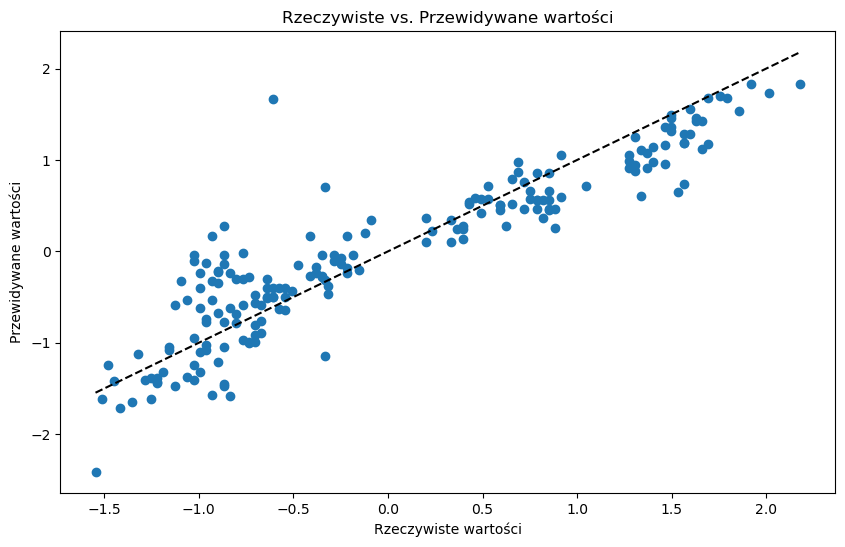

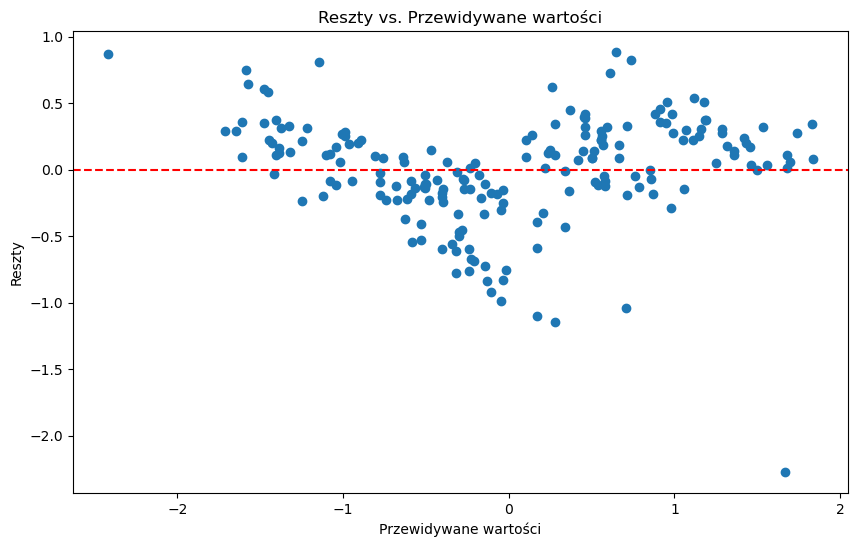

In [337]:
import matplotlib.pyplot as plt

predicted_values = model.predict(X_significant)
residuals = y - predicted_values

# Wykres rzeczywistych vs przewidywanych wartości
plt.figure(figsize=(10, 6))
plt.scatter(x=y, y=predicted_values)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Rzeczywiste vs. Przewidywane wartości')
plt.show()

# Wykres reszt
plt.figure(figsize=(10, 6))
plt.scatter(x=predicted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Reszty')
plt.title('Reszty vs. Przewidywane wartości')
plt.show()


Zapis wyczyszczonego pliku

In [338]:
cleaned_file_path = 'cleaned_messy_data.csv'
data.to_csv(cleaned_file_path, index=False)


In [339]:
data_cleaned = pd.read_csv(cleaned_file_path)
data_cleaned

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price,id
0,-1.031334,if,d,ideal,-1.051436,-1.131595,-1.272582,-3.407862,0.071725,-0.736628,0
1,-0.312102,vvs2,e,premium,-0.254602,0.030604,-0.461115,-1.374733,1.609830,-0.250690,1
2,-0.132294,si2,h,good,-2.113882,-2.468919,0.033373,-0.154855,-0.697327,-1.481733,2
3,1.485977,if,d,ideal,0.011010,1.527133,1.263253,-2.594610,0.840778,1.531082,3
4,0.407130,i1,j,fair,0.143816,0.030604,-0.004664,-2.594610,0.071725,-0.931003,4
...,...,...,...,...,...,...,...,...,...,...,...
188,0.586938,si1,g,ideal,0.675039,0.890312,0.654653,0.048458,-0.697327,0.591602,194
189,-1.211141,si1,f,very good,-1.317048,-1.545528,0.033373,0.251771,1.609830,-0.963399,195
190,1.665785,vvs2,h,good,1.339067,0.030604,1.440761,0.048458,-1.466380,1.660666,196
191,0.227322,si2,e,fair,0.276621,0.428617,0.198202,0.048458,0.840778,0.332435,198


In [340]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        193 non-null    float64
 1   clarity      193 non-null    object 
 2   color        193 non-null    object 
 3   cut          193 non-null    object 
 4   x dimension  193 non-null    float64
 5   y dimension  193 non-null    float64
 6   z dimension  193 non-null    float64
 7   depth        193 non-null    float64
 8   table        193 non-null    float64
 9   price        193 non-null    float64
 10  id           193 non-null    int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 16.7+ KB
